In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
fifa = pd.read_csv('data/fifa_data.csv')
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [8]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Histograms ###

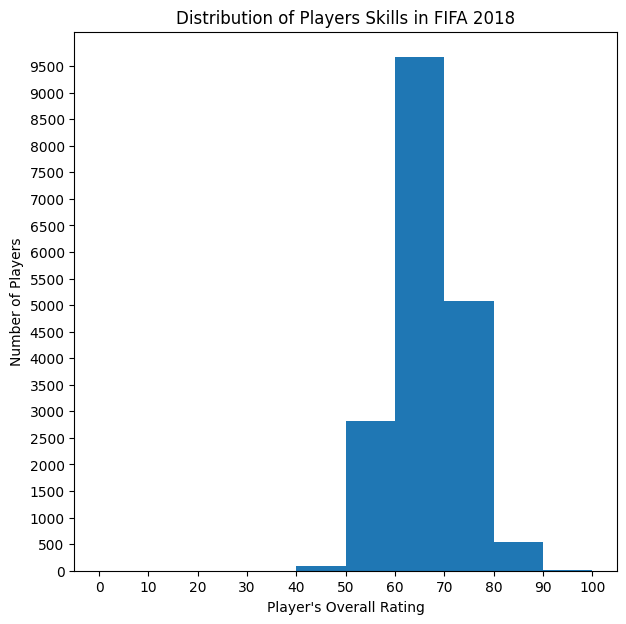

In [9]:
plt.figure(figsize=(7,7))
bins = [0,10,20,30,40,50,60,70,80,90,100]

plt.hist(fifa.Overall, bins= bins)

plt.xticks(bins)
plt.yticks(np.arange(0, 10000, 500))

plt.xlabel('Player\'s Overall Rating')
plt.ylabel('Number of Players')
plt.title('Distribution of Players Skills in FIFA 2018')
plt.show()

## plot a pie chart

In [10]:
fifa.Weight

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18207, dtype: object

/tmp/ipykernel_59920/1456538866.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
/tmp/ipykernel_59920/1456538866.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]


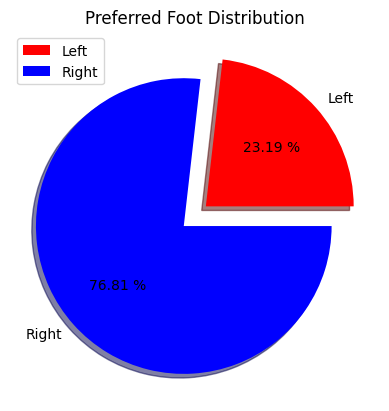

In [11]:
"""
    trying the count the number of players who prefer to play with their left foot
    and then turn that to a pie chart
    """
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]


colors = ['red', 'blue']
fig, ax = plt.subplots()

ax.pie([left, right], labels=['Left', 'Right'], explode=[0.1, 0.1],
        colors = colors, autopct="%.2f %%",
        shadow=True)


plt.title('Preferred Foot Distribution')
plt.legend()
plt.show()

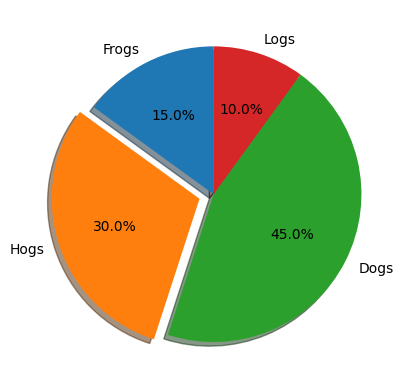

In [12]:

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
plt.show()


/tmp/ipykernel_59920/1425093583.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  light = fifa.loc[fifa['Weight'] < 125].count()[0]
/tmp/ipykernel_59920/1425093583.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  light_medium = fifa.loc[(fifa['Weight'] >= 125)&(fifa.Weight < 150)].count()[0]
/tmp/ipykernel_59920/1425093583.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  medium = fifa.loc[(fifa['Weight'] >= 150)&(fifa.Wei

Text(0.5, 1.0, 'Weight Distribution')

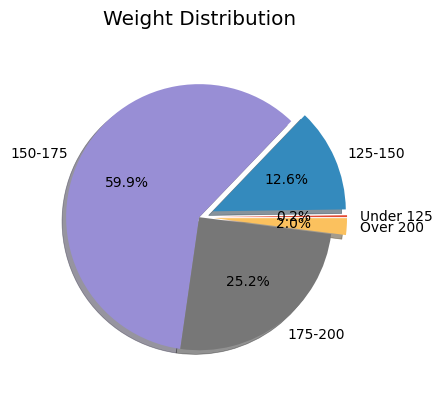

In [13]:
fifa['Weight'].fillna(0)

"""
    trying to convert the weight column to float
"""

plt.style.use('ggplot')
fifa['Weight'] = fifa['Weight'].astype(str).apply(lambda x: x.strip('lbs')).astype(float)

light = fifa.loc[fifa['Weight'] < 125].count()[0]
light_medium = fifa.loc[(fifa['Weight'] >= 125)&(fifa.Weight < 150)].count()[0]
medium = fifa.loc[(fifa['Weight'] >= 150)&(fifa.Weight < 175)].count()[0]
medium_heavy = fifa.loc[(fifa['Weight'] >= 175)&(fifa.Weight < 200)].count()[0]
heavy = fifa.loc[fifa['Weight'] >= 200].count()[0]


weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ['Under 125', '125-150', '150-175', '175-200', 'Over 200']
fig, ax = plt.subplots()

ax.pie(weights,explode= [0.1, 0.1, 0, 0, 0.1], labels=labels, autopct='%1.1f%%', shadow=True,
       radius=0.9)
plt.title('Weight Distribution')

In [14]:
overall = fifa.Overall[0]
print(overall)

94


In [15]:
barca = fifa.loc[fifa.Club == 'FC Barcelona' ]['Overall']
barca

0        94
7        91
18       89
20       89
32       88
42       87
49       87
53       87
54       87
96       85
155      83
192      83
228      82
236      82
239      82
263      82
266      82
324      81
613      79
1007     77
1037     77
3118     73
3684     72
6000     69
6102     69
8284     67
8289     67
8857     66
10526    65
10777    65
11300    64
12502    63
14286    61
Name: Overall, dtype: int64

### box and wisckers 

/tmp/ipykernel_59920/4063636819.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([barca, madrid, revs],labels=['Barca', 'Madrid', 'New England Revolution'])
/tmp/ipykernel_59920/4063636819.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


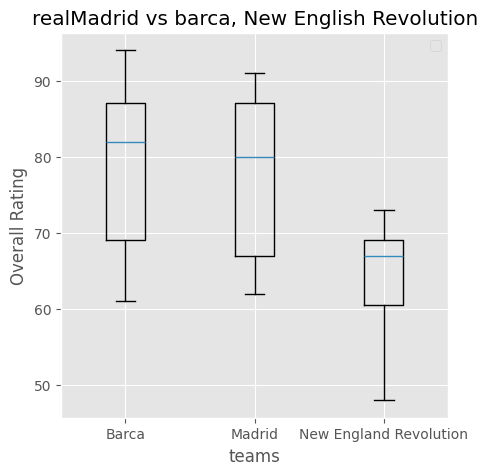

In [16]:
barca = fifa.loc[fifa.Club == 'FC Barcelona' ]['Overall']
madrid = fifa.loc[fifa.Club == 'Real Madrid' ]['Overall']
revs  = fifa.loc[fifa.Club == 'New England Revolution' ]['Overall']

plt.style.use('ggplot')
plt.figure(figsize=(5,5))
colors = ['red', 'blue']
plt.boxplot([barca, madrid, revs],labels=['Barca', 'Madrid', 'New England Revolution'])

#

plt.legend()
plt.title('realMadrid vs barca, New English Revolution')
plt.ylabel('Overall Rating')
plt.xlabel('teams')
plt.show()

/tmp/ipykernel_59920/63205586.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot([barca, madrid, revs], labels=['Barca', 'Madrid', 'New England Revolution'], patch_artist=True)# for the line inside the box adjustment, use madianprop= {'linewidth':2}
/tmp/ipykernel_59920/63205586.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


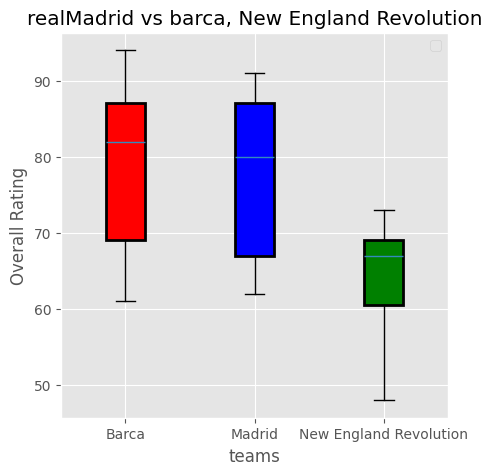

In [17]:
plt.style.use('ggplot')
plt.figure(figsize=(5,5))

# Create a list of colors
colors = ['red', 'blue', 'green']

# Create the box plot
bp = plt.boxplot([barca, madrid, revs], labels=['Barca', 'Madrid', 'New England Revolution'], patch_artist=True)# for the line inside the box adjustment, use madianprop= {'linewidth':2}

# Loop through each in-box line and set the color
for box in bp['boxes']:
    box.set(color= 'black', linewidth=2)

# Loop through each box and set the color
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Loop through each whisker and set the linewidth
for whisker in bp['whiskers']:
    whisker.set_linewidth(1)

plt.legend()
plt.title('realMadrid vs barca, New England Revolution')
plt.ylabel('Overall Rating')
plt.xlabel('teams')
plt.show()